## Simple Audio Inference without using TensorFlow for preprocessing data

We will use scipy/numpy instead.

In [64]:
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display

import pyaudio

from scipy.io import wavfile
from scipy import signal
import IPython

In [7]:
model = tf.keras.models.load_model('simple_audio_model.sav')
print('loaded saved model.')
print(model.summary())

loaded saved model.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing (Resizing)          (None, 32, 32, 1)         0         
_________________________________________________________________
normalization (Normalization (None, 32, 32, 1)         3         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 

### Create spectrogram from WAV file.


In [61]:

def get_spectrogram(wavfile_name):
    
    rate, data = wavfile.read(wavfile_name)
    nfft = 200 # Length of each window segment
    fs = 8000 # Sampling frequencies
    noverlap = 120 # Overlap between windows
    nchannels = data.ndim
    
    data = data / 32768.0
    
    f, t, Zxx = signal.stft(data, fs=16000, nperseg=255, noverlap = 124, nfft=256)
    spec = np.abs(Zxx)
    
    print(f.shape, t.shape, Zxx.shape, spec.shape)
    print(data.shape)
    print(rate, data, nchannels)
    
    return data, f, t, spec


def plot(data, f, t, spec):
    fig, axes = plt.subplots(2, figsize=(12, 8))

    timescale = np.arange(waveform.shape[0])
    axes[0].plot(timescale, waveform)
    axes[0].set_title('Waveform')
    axes[0].set_xlim([0, 16000])
    axes[0].set_ylim([-1, 1])
    
    # Convert to frequencies to log scale and transpose so that the time is
    # represented in the x-axis (columns).
    log_spec = np.log(spec.T)
    axes[1].pcolormesh(f, t, log_spec)
    axes[1].set_title('Spectrogram')
    plt.show()

In [67]:
data_dir = pathlib.Path('data/mini_speech_commands')
wavfile_name = data_dir/'stop/c1d39ce8_nohash_9.wav'

IPython.display.Audio(wavfile_name)

(129,) (124,) (129, 124) (129, 124)
(16000,)
16000 [0.0010376  0.0010376  0.00128174 ... 0.00186157 0.00189209 0.00204468] 1


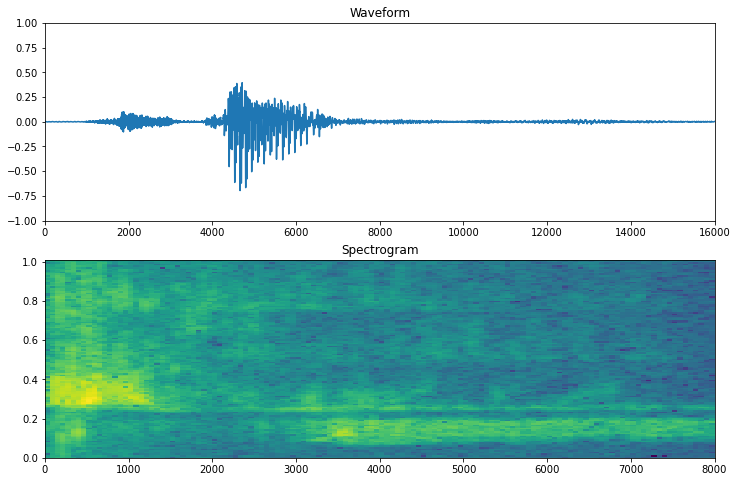

In [62]:

data, f, t, Zxx = get_spectrogram(wavfile_name)
plot(data, f, t, Zxx)

#prediction = model(spectrogram)
#print(prediction)